## Penerapan Closeness Centrality

In [ ]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import re
import networkx as nx
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Memanggil Dataset
data = pd.read_csv("/content/drive/MyDrive/ppw/ppw/crawling_berita_pb.csv")
data

,Judul,Isi,Kategori
0,Erik Ten Hag Tolak 'Bejek' Skuad Setan Merah U...,POJOKBACA.ID -PelatihManchester United(MU)Eri...,Sport
1,Muhaimin Minta Jokowi Adil di Pilpres 2024: Is...,"JAKARTA, POJOKBACA.ID -Bakal calon wakil pres...",Politik
2,"Sedang Bermain dan Berbagi Peran, Megawati-Jok...","JAKARTA, POJOKBACA.ID -Polemik politik tanah a...",Politik
3,Prabowo Subianto Kunjungi SBY Sebelum Daftar C...,"BOGOR, POJOKBACA.ID- Ketua Umum Partai Gerind...",Politik
4,Universitas Gunadarma Ciptakan Robot Catur Cap...,"JAKARTA, POJOKBACA.ID– Robot Catur benar-bena...",Sport
...,...,...,...
431,Ketua Umum Pro Jokowi: Prabowo - Gibran Akan M...,"SOLO, POJOKBACA.ID -Ketua Umum ProJokowi(Proj...",Politik
432,"Ganjar-Mahfud Didukung Ratusan Pedagang Pasar,...","MATARAM, POJOKBACA.ID -Ratusan pedagang canan...",Politik
433,PLN Unit Induk Distribusi Jakarta Raya Gelar A...,"JAKARTA, POJOKBACA.ID- Gelaran sepakbola akba...",Sport
434,Jadwal Siaran langsung Timnas Indonesia U-17 d...,"POJOKBACA.ID -PadaPiala Dunia U-172023,Timnas...",Sport


In [ ]:
# Memberikan nomer pada dokumen
data['Dokumen ke'] = data.reset_index(drop=True).index + 1
# data

In [ ]:
# Memanggil dokumen dengan nomer yang digunakan sebagai percobaan
data_2 = data[data['Dokumen ke'] == 2]
data_2

,Judul,Isi,Kategori,Dokumen ke
1,Muhaimin Minta Jokowi Adil di Pilpres 2024: Is...,"JAKARTA, POJOKBACA.ID -Bakal calon wakil pres...",Politik,2


## Tokenize

In [ ]:
# membuat list untuk hasil tokenize
hasil_kalimat=[]
# Melakukan perulangan untuk memisahkan berita per-kalimat
for i in range(len(data_2)):
  token = sent_tokenize(data['Isi'][i])
  hasil_kalimat.append(token)

In [ ]:
# membuat list untuk hasil transpose tokenize sebelumnya
kalimat = []
# melakukan perulangan untuk merubah hasil tokenize / transpose data
for i in range(len(hasil_kalimat)):
  for x in range (len(hasil_kalimat[i])):
    datacek = []
    datacek.append(i)
    datacek.append(hasil_kalimat[i][x])
    kalimat.append(datacek)
# kalimat

In [ ]:
databaru = pd.DataFrame(kalimat, columns=['Dokumen ke','kalimat'])
databaru.loc[:, 'Dokumen ke'] = 2
databaru

,Dokumen ke,kalimat
0,2,POJOKBACA.ID -PelatihManchester United(MU)Eri...
1,2,MU baru saja menelan kekalahan 0-3 dari Newcas...
2,2,"Melalui gol dari Miguel Almiron, Lewis Hall, d..."
3,2,"“Ya, kami tahu ini tidak cukup baik."
4,2,Saya harus bertanggung jawab.
5,2,"Saya merasa kasihan kepada para penggemar,” uc..."
6,2,"Baca Juga:Aplikasi Sedulur Resmi Diluncurkan, ..."
7,2,"Selain itu, kekalahan ini juga menjadi yang ke..."
8,2,“Pemain akan bangkit.
9,2,"Mereka bersatu, Anda lihat mereka mencobanya."


## Cleansing

In [ ]:
#Remove Puncutuation
clean_symbol = re.compile('[^\w\s.?!,/]')
def clean_punct(text):
    text = clean_symbol.sub(' ', text)
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation
preprocessing = databaru['kalimat'].apply(clean_punct)
clean=pd.DataFrame(preprocessing)
clean

,kalimat
0,POJOKBACA.ID PelatihManchester United MU Eri...
1,MU baru saja menelan kekalahan 0 3 dari Newcas...
2,"Melalui gol dari Miguel Almiron, Lewis Hall, d..."
3,"Ya, kami tahu ini tidak cukup baik."
4,Saya harus bertanggung jawab.
5,"Saya merasa kasihan kepada para penggemar, uc..."
6,"Baca Juga Aplikasi Sedulur Resmi Diluncurkan, ..."
7,"Selain itu, kekalahan ini juga menjadi yang ke..."
8,Pemain akan bangkit.
9,"Mereka bersatu, Anda lihat mereka mencobanya."


## TF-IDF

In [ ]:
# Menghitung TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(clean['kalimat'])

In [ ]:
tf_name=vectorizer.get_feature_names_out()
tf_array = tfidf_matrix.toarray()

df_tf= pd.DataFrame(tf_array, columns = tf_name)
df_tf

,15,2024,ajang,ajax,akan,albion,almiron,amsterdam,anda,aplikasi,...,trafford,tujuh,ucap,united,warga,wib,willock,ya,yakin,yang
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.222481,0.000000,0.000000,0.200389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.279288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.244999,0.000000,0.000000,0.220671,0.000000,0.279288,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.205193,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.205193,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.401129,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.260243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199402,...,0.000000,0.000000,0.000000,0.157551,0.199402,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.195004,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140901
8,0.000000,0.000000,0.000000,0.000000,0.600893,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.319488,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Cosine Similarity

In [ ]:
# Menghitung cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
len(cosine_similarities)

19

In [ ]:
threshold=0.2
G = nx.Graph()
for i in range(len(cosine_similarities)):
    for j in range(len(cosine_similarities)):
      if j != i :
        sim = cosine_similarities[i][j]
        if sim > threshold:
          G.add_edge(i, j, weight=sim)
        print(i,',',j,'=',sim)

0 , 1 = 0.24560927061080523
0 , 2 = 0.05756785736998833
0 , 3 = 0.0
0 , 4 = 0.21072928521750967
0 , 5 = 0.03928149951408608
0 , 6 = 0.054093858298744635
0 , 7 = 0.03867669555050642
0 , 8 = 0.0
0 , 9 = 0.0
0 , 10 = 0.0
0 , 11 = 0.061282163297655866
0 , 12 = 0.06588528760475915
0 , 13 = 0.103980818120779
0 , 14 = 0.06186151853940795
0 , 15 = 0.0
0 , 16 = 0.0
0 , 17 = 0.11814998703343092
0 , 18 = 0.0665136998105485
1 , 0 = 0.24560927061080523
1 , 2 = 0.04921391168114174
1 , 3 = 0.0
1 , 4 = 0.0
1 , 5 = 0.10701677787952721
1 , 6 = 0.14527976258733064
1 , 7 = 0.07102523957365478
1 , 8 = 0.0
1 , 9 = 0.0
1 , 10 = 0.0
1 , 11 = 0.0
1 , 12 = 0.060111279340431534
1 , 13 = 0.16034556864227692
1 , 14 = 0.09387927134408863
1 , 15 = 0.0
1 , 16 = 0.0
1 , 17 = 0.0
1 , 18 = 0.0
2 , 0 = 0.05756785736998833
2 , 1 = 0.04921391168114174
2 , 3 = 0.0
2 , 4 = 0.0
2 , 5 = 0.03178119828097469
2 , 6 = 0.0
2 , 7 = 0.1685178647587543
2 , 8 = 0.0
2 , 9 = 0.0
2 , 10 = 0.07591188633056326
2 , 11 = 0.0
2 , 12 = 0.044163

## Closeness Centrality

In [ ]:
# Menghitung closeness centrality apabila dibawah threshold=0,2 tidak akan dimasukkan
closeness_centrality = nx.closeness_centrality(G)
# closeness_centrality

In [ ]:
# merubah hasil closeness centrality menjadi dataframe
df_closeness = pd.DataFrame({'Closeness Centrality': closeness_centrality})
df_closeness

,Closeness Centrality
0,0.555556
1,0.384615
4,0.714286
10,0.384615
17,0.555556
18,0.454545


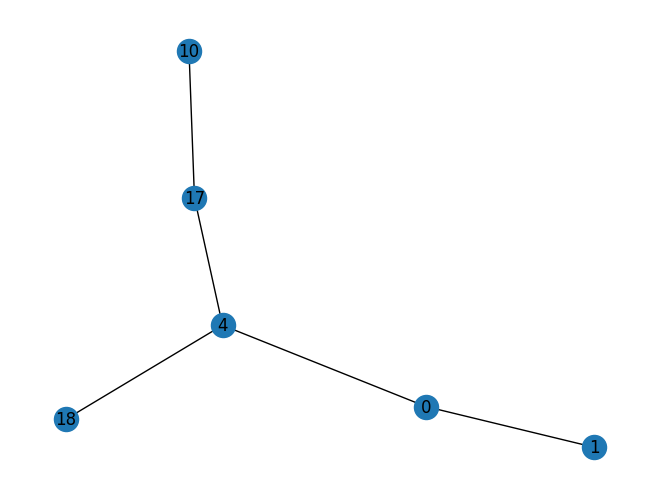

In [ ]:
# menampilkan hasil closeness dalam bentuk graph
nx.draw(G, with_labels=True)

In [ ]:
# Menggabungkan data closeness dengan data isi berita
closeness_centrality= clean.join(df_closeness)
# closeness_centrality

In [ ]:
# menambahkan index untuk urutan kalimat pada berita sebelum disorting
closeness_centrality['Kalimat ke'] = closeness_centrality.reset_index(drop=True).index + 1
# closeness_centrality

## Meringkas Kalimat

In [ ]:
# melakukan sorting berdasarkan nilai Closeness Centrality tertinggi
closeness_centrality.sort_values('Closeness Centrality', ascending=False, inplace=True)

# Menampilkan DataFrame yang telah diurutkan
# closeness_centrality

In [ ]:
# Mengambil 6 kalimat dengan nilai closeness centrality tertinggi
top_sentences = closeness_centrality.head(6)
top_sentences

,kalimat,Closeness Centrality,Kalimat ke
4,Saya harus bertanggung jawab.,0.714286,5
0,POJOKBACA.ID PelatihManchester United MU Eri...,0.555556,1
17,"Saya bertanggung jawab, tetapi saya melihatny...",0.555556,18
18,Saya harus tetap bersatu dengan para pemain da...,0.454545,19
1,MU baru saja menelan kekalahan 0 3 dari Newcas...,0.384615,2
10,Anda harus melakukannya sebagai sebuah tim.,0.384615,11


In [ ]:
# mengurutkan kalimat setelah melakukan pemilihan 6 kalimat terpenting berdasarkan nomer urut kalimat sebelumnya
result = top_sentences.groupby('Kalimat ke')['kalimat'].apply(' '.join).reset_index()

# Menggabungkan kalimat yang terpisah sebelumnya menjadi 1
text = ' '.join(result['kalimat'])
text

' POJOKBACA.ID  PelatihManchester United MU Erik ten Hagmengatakan bertanggung jawab penuh atas dua kekalahan timnya dengan skor 0 3 di Old Trafford. MU baru saja menelan kekalahan 0 3 dari Newcastle United pada ajang Piala Liga di Old Trafford, Kamis WIB. Saya harus bertanggung jawab. Anda harus melakukannya sebagai sebuah tim.  Saya bertanggung jawab, tetapi saya melihatnya sebagai sebuah tantangan. Saya harus tetap bersatu dengan para pemain dan berjuang bersama,  lanjutnya.'

## Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [ ]:
# Menghitung TF-IDF
vec = TfidfVectorizer()
tfidf = vec.fit_transform(data['Isi']).toarray()

In [ ]:
y=data['Kategori']
X_train,X_test,y_train,y_test = train_test_split(tfidf,y,test_size=0.2,random_state=42)

In [ ]:
NB = GaussianNB()
gaus=NB.fit(X_train, y_train)

In [ ]:
y_pred = gaus.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 0.9204545454545454


In [ ]:
metode_KNN = KNeighborsClassifier(n_neighbors=5)
metode_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print("Hasil Akurasi Data Training Menggunakan KNN sebesar : ", (100 * metode_KNN.score(X_train, y_train)))
print("Hasil Akurasi Data Testing Menggunakan KNN sebesar : ", (100 * (metode_KNN.score(X_test, y_test))))

Hasil Akurasi Data Training Menggunakan KNN sebesar :  96.83908045977012
Hasil Akurasi Data Testing Menggunakan KNN sebesar :  98.86363636363636


In [ ]:
metode_DT = tree.DecisionTreeClassifier(criterion="gini")
metode_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print("Hasil Akurasi Data Training Menggunakan Decision Tree sebesar : ", (100 * metode_DT.score(X_train, y_train)))
print("Hasil Akurasi Data Testing Menggunakan Decision Tree sebesar : ", (100 * (metode_DT.score(X_train, y_train))))

Hasil Akurasi Data Training Menggunakan Decision Tree sebesar :  100.0
Hasil Akurasi Data Testing Menggunakan Decision Tree sebesar :  100.0


## Penerapan pada semua berita untuk meringkas semua berita nantinya

## Tokenisasi per Kalimat

In [ ]:
# membuat list untuk hasil tokenize
hasil_kalimat=[]
# Melakukan perulangan untuk memisahkan berita per-kalimat
for i in range(len(data)):
  token = sent_tokenize(data['Isi'][i])
  hasil_kalimat.append(token)

In [ ]:
# membuat list untuk hasil transpose tokenize sebelumnya
kalimat = []
# melakukan perulangan untuk merubah hasil tokenize / transpose data
for i in range(len(hasil_kalimat)):
  for x in range (len(hasil_kalimat[i])):
    datacek = []
    datacek.append(i)
    datacek.append(hasil_kalimat[i][x])
    kalimat.append(datacek)

In [ ]:
# merubah hasil tokenize sebelumnya menjadi sebuah dataframe
databaru = pd.DataFrame(kalimat, columns=["Dokumen ke", "Kalimat"])
databaru

,Dokumen ke,Kalimat
0,0,POJOKBACA.ID -PelatihManchester United(MU)Eri...
1,0,MU baru saja menelan kekalahan 0-3 dari Newcas...
2,0,"Melalui gol dari Miguel Almiron, Lewis Hall, d..."
3,0,"“Ya, kami tahu ini tidak cukup baik."
4,0,Saya harus bertanggung jawab.
...,...,...
7459,435,Ini akan membantu memperpanjang umur bateraihp...
7460,435,Itulah beberapa tips agarhptidak cepatlowbet.
7461,435,"Dengan mengikuti tips-tips di atas, pengguna d..."
7462,435,Selalu ingat untuk selalu membawa charger atau...


## Cleansing

In [ ]:
#Remove Puncutuation
clean_symbol = re.compile('[^\w\s.?!,/]')
def clean_punct(text):
    text = clean_symbol.sub(' ', text)
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation
preprocessing = databaru['Kalimat'].apply(clean_punct)
clean=pd.DataFrame(preprocessing)
clean['Dokumen ke']=databaru['Dokumen ke'].values
clean

,Kalimat,Dokumen ke
0,POJOKBACA.ID PelatihManchester United MU Eri...,0
1,MU baru saja menelan kekalahan 0 3 dari Newcas...,0
2,"Melalui gol dari Miguel Almiron, Lewis Hall, d...",0
3,"Ya, kami tahu ini tidak cukup baik.",0
4,Saya harus bertanggung jawab.,0
...,...,...
7459,Ini akan membantu memperpanjang umur bateraihp...,435
7460,Itulah beberapa tips agarhptidak cepatlowbet.,435
7461,"Dengan mengikuti tips tips di atas, pengguna d...",435
7462,Selalu ingat untuk selalu membawa charger atau...,435


## TF-IDF

In [ ]:
# Menghitung TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(clean['Kalimat'])

In [ ]:
tf_name=vectorizer.get_feature_names_out()
tf_array = tfidf_matrix.toarray()

df_tf= pd.DataFrame(tf_array, columns = tf_name)
df_tf

,00,000,000an,000komputerdi,000layar,000samsung,000x3,00151,004,01,...,zona,zondalam,zonjuga,zonmemastikan,zontelah,zoom,zsemakin,zulhas,zulkifli,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Similarity

In [ ]:
# Menghitung cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# menyetel batas threshold untuk closeness centrality sebesar 0,5
threshold=0.5
# inisiasi variabel G sebagai graph
G = nx.Graph()
# perulangan untuk menghitung closeness centrality antar dokumen berdasarkan jumlah cosine similarities
for i in range(len(cosine_similarities)):
    for j in range(len(cosine_similarities)):
      # melakukan permisalan agar kalimat tidak dibandindkan dengan kalimat yang sama
      if i != j:
        sim = cosine_similarities[i][j]
        # melakukan pembatasan sehingga yang diinputkan hanya yang diatas nilai threshold
        if sim > threshold:
          G.add_edge(i, j, weight=sim)
          print(i,',',j,'=',sim)

4 , 17 = 0.6233405154424684
17 , 4 = 0.6233405154424684
22 , 1490 = 0.532261281228443
23 , 5825 = 0.513426149077395
25 , 1497 = 0.6300592020286585
25 , 2954 = 0.5489844080764691
26 , 765 = 0.5359105829313249
27 , 1113 = 0.7610483305323376
27 , 1497 = 0.6629885321504021
27 , 2747 = 0.5442699431289661
27 , 3098 = 0.5359129829436925
27 , 5014 = 0.7032926366111086
27 , 5577 = 0.8550864121555564
27 , 5885 = 0.6572431643869489
27 , 6381 = 0.5651739149410978
28 , 1114 = 0.6854371156816045
28 , 1498 = 0.6854371156816045
28 , 3099 = 0.6854371156816045
28 , 3205 = 0.5402467666605076
28 , 3317 = 0.6854371156816045
28 , 3874 = 0.6854371156816045
28 , 4478 = 0.662297128875452
28 , 5015 = 0.5421001888881218
28 , 5578 = 0.6165679430530828
28 , 5886 = 0.6854371156816045
29 , 3101 = 0.9669289131356907
29 , 4479 = 0.9743256923317468
29 , 5016 = 0.9743256923317468
29 , 5579 = 1.0
29 , 7419 = 0.881747018473719
30 , 2048 = 0.8526487082945213
30 , 2766 = 0.5775875829579953
30 , 5146 = 0.5116548099269025
52 

## Closeness Centrality

In [ ]:
# Menghitung closeness centrality menggunakan library networkx
closeness_centrality = nx.closeness_centrality(G)
# closeness_centrality

In [ ]:
# Menambahkan closeness centrality ke dalam dataframe hasil cleansing
clean['Closeness Centrality'] = clean['Dokumen ke'].map(closeness_centrality)
# Menampilkan dataframe kalimat
# clean

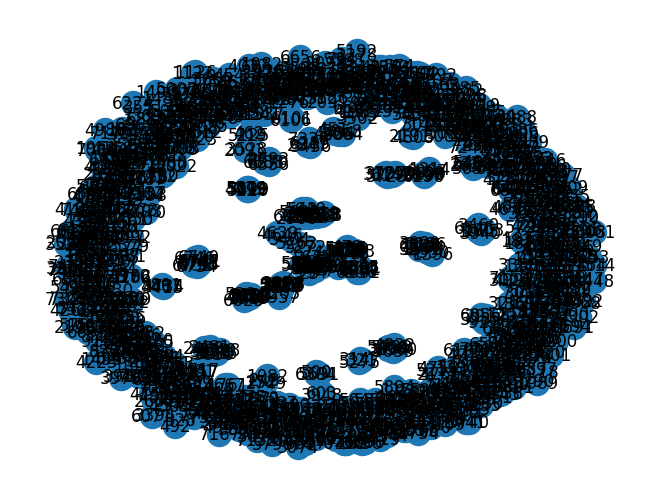

In [ ]:
# menampilkan hasil graph semua dokumen
nx.draw(G, with_labels=True)

## Meringkas Kalimat

In [ ]:
# melakukan sorting berdasarkan nilai Closeness Centrality tertinggi
clean.sort_values('Dokumen ke', ascending=True, inplace=True)

# Menampilkan DataFrame yang telah diurutkan
# clean

In [ ]:
# Mengambil 6 kalimat dengan nilai closeness centrality tertinggi
top_sentences = clean.groupby('Dokumen ke').head(6)
# top_sentences

,Kalimat,Dokumen ke,Closeness Centrality
16,"Saya yakin saya mampu melakukannya, namun saat...",0,NaN
0,POJOKBACA.ID PelatihManchester United MU Eri...,0,NaN
9,"Mereka bersatu, Anda lihat mereka mencobanya.",0,NaN
1,MU baru saja menelan kekalahan 0 3 dari Newcas...,0,NaN
2,"Melalui gol dari Miguel Almiron, Lewis Hall, d...",0,NaN
...,...,...,...
7454,"Jika memungkinkan, kurangi penggunaan media so...",435,NaN
7445,POJOKBACA.ID HPatau handphone adalah alat ko...,435,NaN
7447,Hal ini dapat mengganggu aktivitas sehari hari...,435,NaN
7448,Berikut adalah beberapa tips agarhptidak cepat...,435,NaN


In [ ]:
# Menggabungkan 6 kalimat teratas berdasarkan closeness centrality pada setiap dokumen berdasarkan 'Dokumen ke'
result = top_sentences.groupby('Dokumen ke')['Kalimat'].apply(' '.join).reset_index()

# Menampilkan hasil penggabungan
result

,Dokumen ke,Kalimat
0,0,"Saya yakin saya mampu melakukannya, namun saat..."
1,1,Hal itu disampaikan Ketua Umum DPP Partai Keba...
2,2,Politik dinasti seharusnya menjadi common ene...
3,3,Kalau akan melakukan satu langkah yang penting...
4,4,Pada tahun 1909 di usia 20 tahun diluar dugaan...
...,...,...
431,431,"Pokoknya kami yakin, kami tahu hari nurani ra..."
432,432,Lebih jauh Putu Pasek berjanji akan mengorgani...
433,433,Kami pastikan suplai listrik ke seluruh venue...
434,434,"Di artikel ini, kami akan mengulas jadwalsiara..."


## Modelling

In [ ]:
# Memanggil package atau library untuk modelling
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
# Menghitung TF-IDF pada berita yang telah diringkas
vec = TfidfVectorizer()
tfidf_result = vec.fit_transform(result['Kalimat']).toarray()

In [ ]:
y=data['Kategori']
# Menentukan nilai training dan testing
X_train,X_test,y_train,y_test = train_test_split(tfidf_result,y,test_size=0.2,random_state=42)

In [ ]:
NB = GaussianNB()
gaus=NB.fit(X_train, y_train)

In [ ]:
y_pred = gaus.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 0.9318181818181818


In [ ]:
metode_KNN = KNeighborsClassifier(n_neighbors=5)
metode_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
metode_KNN.score(X_test, y_test)

0.9659090909090909

In [ ]:
metode_DT = tree.DecisionTreeClassifier(criterion="gini")
metode_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
metode_DT.score(X_train, y_train)

1.0